# Análise de Dataset de Vendas 

## Introdução

Este projeto tem como objetivo realizar uma análise exploratória de dados
(EDA) a partir de um dataset de vendas, buscando identificar padrões,
tendências e fatores que impactam o desempenho comercial da empresa.

As principais perguntas que orientam esta análise são:
- Quais categorias geram mais vendas e lucro?
- Como o desconto impacta o lucro?
- Quais regiões apresentam melhor desempenho?


## Entendimento do Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [5]:
df = pd.read_csv(r"C:\Users\dadoa\Downloads\archive (5)\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


O Dataset de Vendas de um Empresa possui aproximadamente uma memória usada de **1015 KB** com informações sobre o  **13 colunas (campos)** desde a segmentação, País, Região, CEP até Quantidade, Desconto e Lucro com **9994 linhas (registros)**. 

## Verificação e Qualidade dos Dados



In [11]:
df.isnull().sum() #Não possui em um dado missing.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
df.duplicated().sum() 

17

Há 17 linhas duplicadas e devem ser removidas do dataset.

In [19]:
df = df.drop_duplicates() #Removendo linhas

In [20]:
df.duplicated().sum() # Verificando se a remoção teve êxito.

0

In [23]:
df.shape

(9977, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


Após a inspeção inicial do dataset, foi observado que:

- Não há valores nulos em nenhuma coluna
- Os tipos de dados estão adequados para análise
- Houve presença de dados duplicados, mas foram removidos
- O dataset já se encontra bem estruturado

Portanto, não foi necessária uma limpeza extensiva dos dados.
Foram realizadas apenas pequenas preparações para facilitar as análises exploratórias.


Retificação: O Dataset de Vendas de um Empresa possui aproximadamente uma memória usada de **1100 KB** com informações sobre o  **13 colunas (campos)** desde a segmentação, País, Região, CEP até Quantidade, Desconto e Lucro com **9977 linhas (registros)**. 

## Preparação Leve dos Dados


Objetivo: Criar colunas auxiliares para facilitar a análise (sem “forçar limpeza”).

 ### Identificar Prejuízo

In [27]:
df["Loss"] = df["Profit"] < 0 

In [28]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,False
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,False
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,False
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,True
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,False


 ### Receita Líquida Estimada

In [31]:
df["Net_Sales"] = df["Sales"] * (1 - df["Discount"])


In [32]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss,Net_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,False,261.960000
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,False,731.940000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,False,14.620000
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,True,526.667625
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,False,17.894400


Foram criadas colunas auxiliares para facilitar a análise exploratória,
como a identificação de vendas com prejuízo e uma estimativa de vendas
líquidas considerando o desconto aplicado.


## Análise Exploratória dos Dados (EDA)

Objetivo: responder aos questionamentos com intrepretação de dados.

### Vendas totais

In [39]:
vt = df["Sales"].sum()
print(f"As vendas totais são de {vt:,.2f}.")

As vendas totais são de 2,296,195.59.


### Vendas por Categoria

In [44]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

As categorias com mais vendas são por ordem descrecente:
- ***Tecnologia com 836,154.03 vendas***
- Furniture com 741,306.31 vendas
- Office Supplies com 718,735.2440 vendas

### Lucro por região

In [47]:
df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

Region
West       108329.8079
East        91506.3092
South       46749.4303
Central     39655.8752
Name: Profit, dtype: float64

As regiões mais lucrativas são por ordem descrecente:
- ***West com 108,329.81***
- East com   91,506.31
- South com  46,749.43 
- Central com 39,655.8752 

### Desconto x lucro

In [49]:
df.groupby("Discount")["Profit"].mean()

Discount
0.00     67.024108
0.10     96.055074
0.15     27.288298
0.20     24.721217
0.30    -45.828401
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -102.116395
Name: Profit, dtype: float64

Observa-se que descontos de até 20% ainda geram lucro positivo.
Entretanto, a partir de 30% de desconto, o lucro torna-se negativo,
indicando que descontos elevados impactam diretamente a rentabilidade
do negócio.

***Descontos acima de 30% geram prejuízo significativo para a empresa.***


 Insight importantes: 
- Desconto ideal: ***entre 0% e 20%***
- Descontos acima de ***30% devem ser evitados***
- Estratégia promocional precisa ser ***controlada***

## Vizualizações

### Vendas por Categoria 

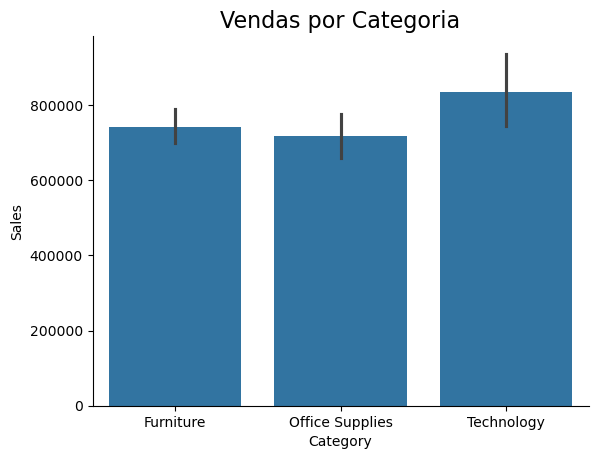

In [53]:
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Vendas por Categoria", fontsize = 16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

### Lucro por região

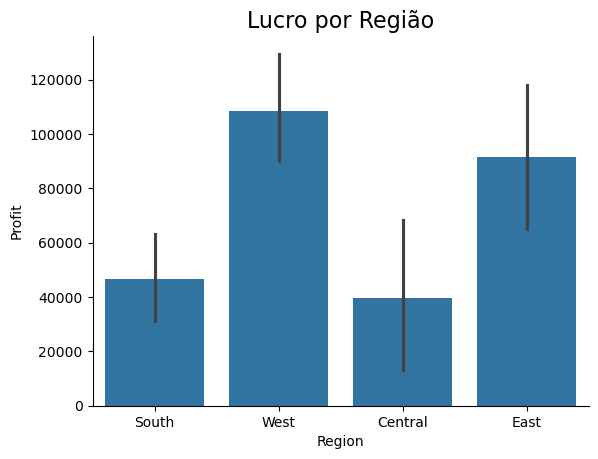

In [57]:
sns.barplot(x="Region", y="Profit", data=df, estimator=sum)
plt.title("Lucro por Região", fontsize = 16)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()


### Desconto X Lucro

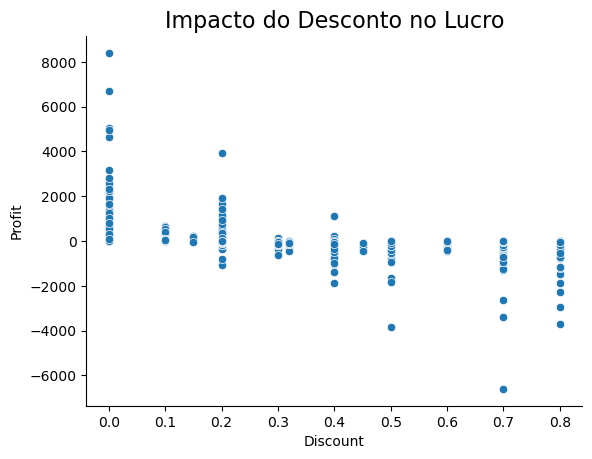

In [62]:
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Impacto do Desconto no Lucro", fontsize = 16)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()


## Insights e Conclusões

- A categoria Technology apresenta maior volume de vendas e lucro.
- Algumas categorias possuem vendas elevadas, mas margem de lucro negativa.
- Regiões como West apresentam melhor desempenho financeiro.
- Altos descontos estão associados a menores lucros, indicando a necessidade
de revisão da política de descontos.
